In [1]:
import numpy as np 
import networkx as nx
import pandas as pd
import json
from pprint import pprint
pd.core.common.is_list_like = pd.api.types.is_list_like 

from tools.comparisons import *
from tools.data_transform import *
from hypotheses.sign_statistics import *
from hypotheses.sign_tests import *
from distributions.multivariate_normal import norm_seq
from distributions.multivariate_t import student_seq



In [2]:
def total_compare(ref_MST, ref_corr, stocks, title):
    print('normal')
    normal = compare_norm(ref_MST, ref_corr, stocks, observ_num=[20, 100, 250], iters=1000, alphas=[0.1])
    with open(f"data/{title}_normal.json", "w") as write_file:
        json.dump(normal, write_file)
        
    print('student')
    student = compare_stud(ref_MST, ref_corr, stocks, observ_num=[20, 100, 250], iters=1000, alphas=[0.1], dofs=[2, 3])
    with open(f"data/{title}_student.json", "w") as write_file:
        json.dump(student, write_file)
        
    print('mix')
    mix = compare_mix(ref_MST, ref_corr, stocks, observ_num=[20, 100, 250], iters=1000, alphas=[0.1], dofs=[2, 3], norm_rates=[0.5, 0.3])
    with open(f"data/{title}_mix.json", "w") as write_file:
        json.dump(mix, write_file)


In [3]:
stcks = ['a', 'b', 'c', 'd', 'e', 'f']
corr = [[1, 0.5, 0, 0, 0, 0],\
        [0.5, 1, 0.5, 0, 0, 0],\
        [0, 0.5, 1, 0.5, 0, 0],\
        [0, 0, 0.5, 1, 0.5, 0],\
        [0, 0, 0, 0.5, 1, 0.5],\
        [0, 0, 0, 0, 0.5, 1]]

corr = np.corrcoef(norm_seq(corr, 1000))
corr

array([[ 1.        ,  0.53299588,  0.07392129,  0.05234684,  0.01072797,
         0.01535395],
       [ 0.53299588,  1.        ,  0.51151134,  0.02468803,  0.04601912,
        -0.0130823 ],
       [ 0.07392129,  0.51151134,  1.        ,  0.52009087,  0.07893666,
        -0.02103905],
       [ 0.05234684,  0.02468803,  0.52009087,  1.        ,  0.49324767,
        -0.06364704],
       [ 0.01072797,  0.04601912,  0.07893666,  0.49324767,  1.        ,
         0.47505796],
       [ 0.01535395, -0.0130823 , -0.02103905, -0.06364704,  0.47505796,
         1.        ]])

True


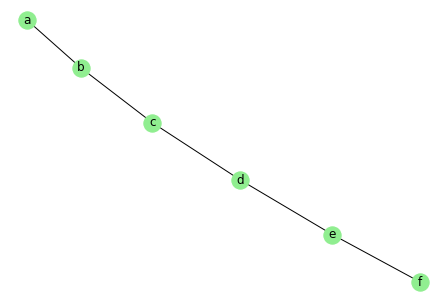

In [4]:
ref_MST1 = create_Kruskal_MST(corr, stcks)

ref_MST2 = create_Prim_MST(corr, stcks)

print(sorted(ref_MST1.degree) == sorted(ref_MST2.degree))
nx.draw(ref_MST2, with_labels=True, node_color='lightgreen')



In [5]:
# total_compare(ref_MST1, corr, stcks, 'path')

 23%|██▎       | 230/1000 [00:00<00:00, 2298.25it/s]

mix


100%|██████████| 1000/1000 [21:39<00:00,  1.30s/it]


In [3]:
stcks = ['a', 'b', 'c', 'd', 'e', 'f']
corr = [[1, 0.4, 0.4, 0.4, 0.4, 0.4],\
        [0.4, 1, 0, 0, 0, 0],\
        [0.4, 0, 1, 0, 0, 0],\
        [0.4, 0, 0, 1, 0, 0],\
        [0.4, 0, 0, 0, 1, 0],\
        [0.4, 0, 0, 0, 0, 1]]

corr = np.corrcoef(norm_seq(corr, 1000))
corr

array([[ 1.        ,  0.42864519,  0.37676899,  0.40684477,  0.42985148,
         0.42279331],
       [ 0.42864519,  1.        ,  0.0045069 , -0.04180915,  0.02261963,
         0.00793239],
       [ 0.37676899,  0.0045069 ,  1.        ,  0.02619799,  0.04502702,
        -0.0087133 ],
       [ 0.40684477, -0.04180915,  0.02619799,  1.        ,  0.03172089,
         0.01267891],
       [ 0.42985148,  0.02261963,  0.04502702,  0.03172089,  1.        ,
         0.02462084],
       [ 0.42279331,  0.00793239, -0.0087133 ,  0.01267891,  0.02462084,
         1.        ]])

True


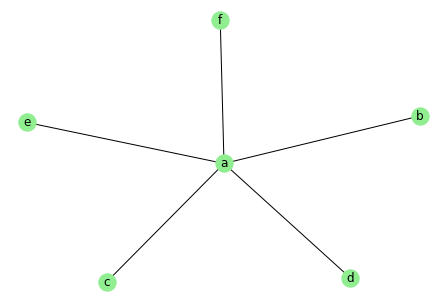

In [4]:
ref_MST1 = create_Kruskal_MST(corr, stcks)

ref_MST2 = create_Prim_MST(corr, stcks)

print(sorted(ref_MST1.degree) == sorted(ref_MST2.degree))
nx.draw(ref_MST2, with_labels=True, node_color='lightgreen')

In [5]:
total_compare(ref_MST1, corr, stcks, 'star')

 22%|██▏       | 221/1000 [00:00<00:00, 2207.75it/s]

normal


 51%|█████     | 512/1000 [00:00<00:00, 2538.76it/s]

student


 25%|██▍       | 249/1000 [00:00<00:00, 2481.95it/s]

mix


100%|██████████| 1000/1000 [27:51<00:00,  1.67s/it]


True


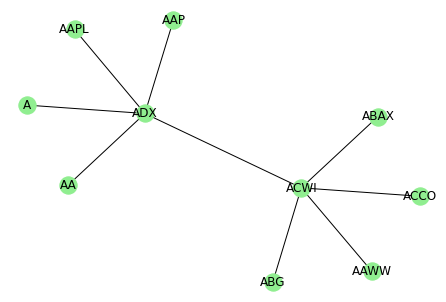

In [6]:
corr = [[1.0000, 0.7220, 0.4681, 0.4809, 0.6209, 0.5380, 0.6252, 0.6285, 0.7786, 0.7909], \
        [0.7220, 1.0000, 0.4395, 0.5979, 0.6381, 0.5725, 0.6666, 0.6266, 0.8583, 0.8640], \
        [0.4681, 0.4395, 1.0000, 0.3432, 0.3468, 0.2740, 0.4090, 0.4016, 0.4615, 0.4832], \
        [0.4809, 0.5979, 0.3432, 1.0000, 0.4518, 0.4460, 0.4635, 0.4940, 0.6447, 0.6601], \
        [0.6209, 0.6381, 0.3468, 0.4518, 1.0000, 0.5640, 0.5994, 0.5369, 0.7170, 0.7136], \
        [0.5380, 0.5725, 0.2740, 0.4460, 0.5640, 1.0000, 0.4969, 0.4775, 0.6439, 0.6242], \
        [0.6252, 0.6666, 0.4090, 0.4635, 0.5994, 0.4969, 1.0000, 0.6098, 0.7161, 0.7158], \
        [0.6285, 0.6266, 0.4016, 0.4940, 0.5369, 0.4775, 0.6098, 1.0000, 0.6805, 0.6748], \
        [0.7786, 0.8583, 0.4615, 0.6447, 0.7170, 0.6439, 0.7161, 0.6805, 1.0000, 0.9523], \
        [0.7909, 0.8640, 0.4832, 0.6601, 0.7136, 0.6242, 0.7158, 0.6748, 0.9523, 1.0000]]

stcks = ['A', 'AA', 'AAP', 'AAPL', 'AAWW', 'ABAX', 'ACCO', 'ABG', 'ACWI', 'ADX']

ref_MST1 = create_Kruskal_MST(corr, stcks)

ref_MST2 = create_Prim_MST(corr, stcks)

print(sorted(ref_MST1.degree) == sorted(ref_MST2.degree))
nx.draw(ref_MST2, with_labels=True, node_color='lightgreen')

In [7]:
total_compare(ref_MST1, corr, stcks, 'twostars')

  0%|          | 0/1000 [00:00<?, ?it/s]

normal


 14%|█▍        | 140/1000 [00:00<00:00, 1393.49it/s]

student


 13%|█▎        | 127/1000 [00:00<00:00, 1264.27it/s]

mix


100%|██████████| 1000/1000 [1:07:06<00:00,  4.03s/it]
